In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, ttest_ind, chi2_contingency

# Load Dataset
dataset_path = "/kaggle/input/machine-predictive-maintenance/data.csv"
data = pd.read_csv(dataset_path)

# 1. Data Overview

#### Checking dagtaset size

In [2]:
print("Dataset Shape:", data.shape)

Dataset Shape: (10000, 10)


#### Identify column types (numerical, categorical).

In [3]:
print(data.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


#### Display the summary statistics (mean, median, mode, etc.) for numerical columns.

In [4]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe(include=[np.number]).T)

print("\nSummary Statistics for Categorical Columns:")
print(data.describe(include=[object]).T)


Summary Statistics for Numerical Columns:
                           count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]     

# Handling Missing Values:

#### Identify any missing values in the dataset.

In [5]:
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


##### No missing values found! But for the sake of the task, we will still try to visualize them and show code for handling the if there would any missing values!

#### How we would impute them?

In [6]:
# Impute missing values for numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


#### By applying this code (above), we will be able to convert missing numerical values into mean value and categorical missing values into mode values.

# Detecting Outliers:

### Use methods like box plots or statistical thresholds (e.g., Z-scores) to detect outliers in numerical columns.

##### Lets try box plot first!

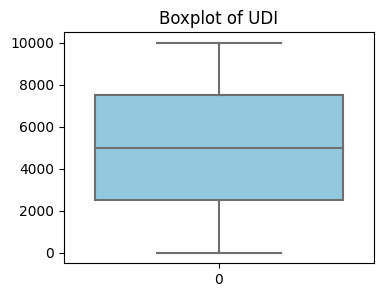

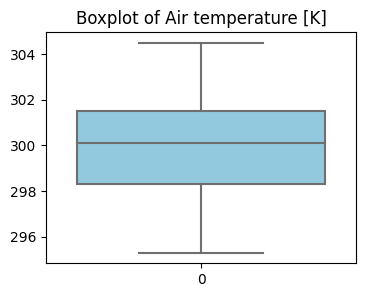

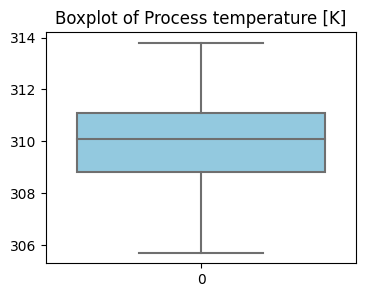

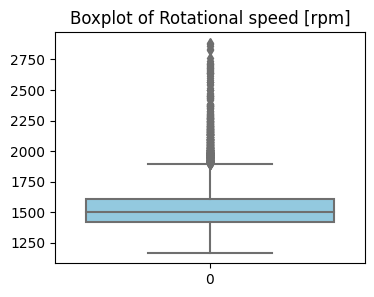

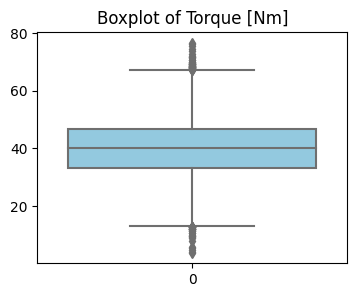

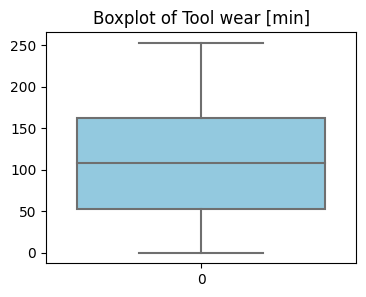

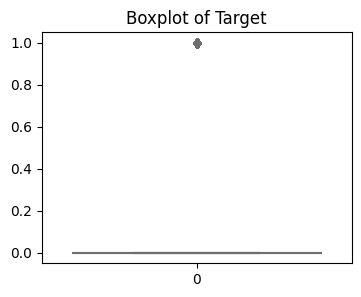

In [7]:
# Visualize boxplots for numerical columns
for column in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.show()

**Rotational speed** and **Torque** seems like unusal. So we can say that there have potential outliers in those 2 columns. We cant count **Target** column because it is a categorical column (0 and 1).

##### Now trying z-score! we will count outliers more than 3 of z scores

In [8]:
# Detect outliers using Z-scores
outlier_indices = {}
outlier_count = {}
for column in numerical_cols:
    z_scores = zscore(data[column])
    outlier_indices[column] = np.where(np.abs(z_scores) > 3)[0]
    outlier_count[column] = len(outlier_indices[column])
    print(f"Outliers in {column}: {outlier_count[column]}")

Outliers in UDI: 0
Outliers in Air temperature [K]: 0
Outliers in Process temperature [K]: 0
Outliers in Rotational speed [rpm]: 164
Outliers in Torque [Nm]: 25
Outliers in Tool wear [min]: 0
Outliers in Target: 339


Exactly matched with previous observation found from boxplot! Potential outliers are in **Rotational speed** and **Torque**

In [9]:
data['Target'].unique()

array([0, 1])

**Target** column is a boolean column. So it will be out of the consideraiton

### Investigate the impact of outliers on the dataset and decide whether to remove or adjust them.

In [10]:
# Optionally remove outliers
data_cleaned = data.copy()
for column in numerical_cols:
    data_cleaned = data_cleaned[(np.abs(zscore(data_cleaned[column])) < 3)]

print("\nDataset Shape After Removing Outliers:", data_cleaned.shape)


Dataset Shape After Removing Outliers: (9529, 10)


# Univariate Analysis:

### Analyze individual variables using histograms, box plots, and descriptive statistics.

##### Doing Histogram

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


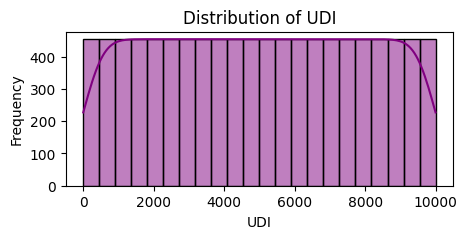

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


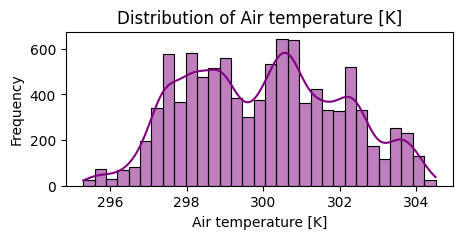

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


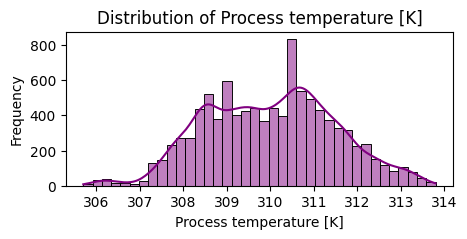

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


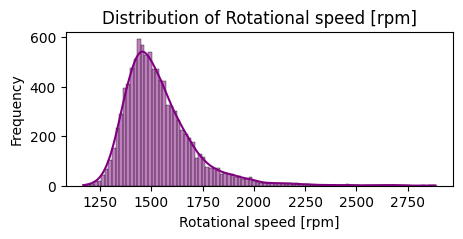

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


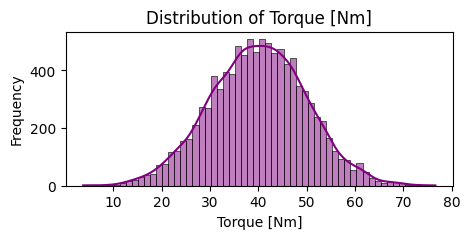

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


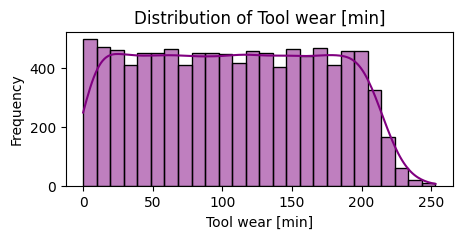

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


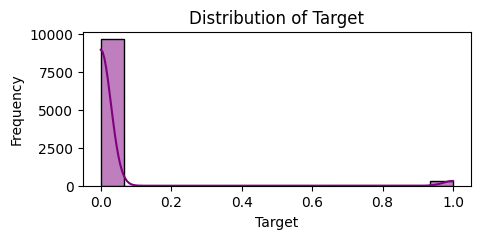

In [11]:
# Histograms for numerical columns
for column in numerical_cols:
    plt.figure(figsize=(5, 2))
    sns.histplot(data[column], kde=True, color='purple')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### Investigate the distribution of data for both numerical and categorical variables.

### Provide insights on the datas spread, central tendency, and skewness.

In [12]:
for column in numerical_cols:
    skewness = data[column].skew()
    kurtosis = data[column].kurt()
    print(f"{column} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")

UDI - Skewness: 0.00, Kurtosis: -1.20
Air temperature [K] - Skewness: 0.11, Kurtosis: -0.84
Process temperature [K] - Skewness: 0.02, Kurtosis: -0.50
Rotational speed [rpm] - Skewness: 1.99, Kurtosis: 7.39
Torque [Nm] - Skewness: -0.01, Kurtosis: -0.01
Tool wear [min] - Skewness: 0.03, Kurtosis: -1.17
Target - Skewness: 5.15, Kurtosis: 24.55


The **UDI** column has a skewness of **0.00**, indicating a perfectly symmetric distribution, while its kurtosis is **-1.20**, suggesting a platykurtic distribution with lighter tails than a normal distribution. 

For **Air temperature [K]**, the skewness is **0.11**, denoting a near-symmetric distribution, and the kurtosis is **-0.84**, reflecting a slightly platykurtic nature. Similarly, the **Process temperature [K]** shows minimal skewness (**0.02**) and a kurtosis of **-0.50**, indicating its distribution is close to normal but slightly flat.

Then, **Rotational speed [rpm]** has a skewness of **1.99**, signifying a strong positive skew, and a kurtosis of **7.39**, pointing to a leptokurtic distribution with sharp peaks and heavy tails. 

**Torque [Nm]** has almost no skewness (**-0.01**) and a kurtosis of **-0.01**, indicating a nearly normal distribution. Likewise, **Tool wear [min]** exhibits a skewness of **0.03** and a kurtosis of **-1.17**, reflecting a nearly symmetric and slightly flat distribution.

Lastly, the **Target** variable displays a high skewness of **5.15**, indicating a strong positive skew, and an extremely high kurtosis of **24.55**, suggesting a highly peaked distribution with heavy tails. This indicates potential outliers or a highly imbalanced dataset for the target variable.

# Bivariate and Multivariate Analysis:

### Explore relationships between variables using scatter plots, correlation matrices, or pair plots.

##### WE are doing in using **Correlation** metrics

In [13]:
data_corr = data.drop(['Target'], axis=1)

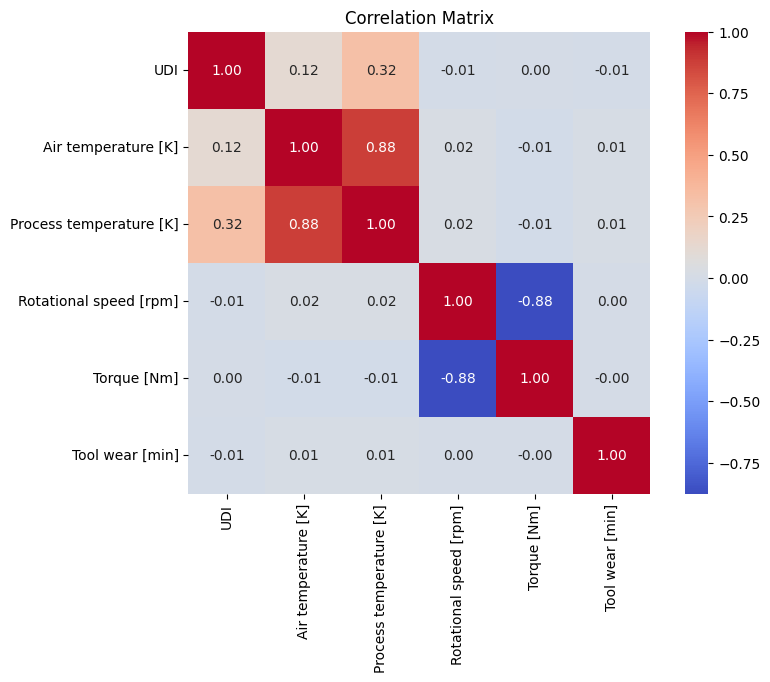

In [14]:
# Correlation Matrix
plt.figure(figsize=(9, 6))
# Select only numeric columns
numeric_data = data_corr.select_dtypes(include=[np.number])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.show()

**Process Temperature [K] and Air Temperature [K]**: A high positive correlation (0.876) indicates that as air temperature increases, process temperature also increases significantly. This relationship is expected as both temperatures are likely influenced by similar environmental or operational conditions.

**UDI and Process Temperature [K]**: A moderate positive correlation (0.324) suggests that there might be a temporal trend where process temperature increases over time (UDI may act as a chronological identifier).

Most other relationships, such as those involving **Rotational Speed [rpm]**, **Torque [Nm]**, and **Tool Wear [min]**, have weak or near-zero correlations with other variables, indicating minimal linear relationships among these variables.

**Rotational Speed [rpm] and Torque [Nm]**: A strong negative correlation (-0.875) suggests that as rotational speed increases, torque decreases, possibly due to mechanical or operational constraints. Other negative correlations (e.g., between Torque [Nm] and Process Temperature [K]) are weak and may not hold significant practical importance.

Variables such as **Tool Wear [min]** show very weak correlations with most other variables, indicating independence or non-linear relationships that are not captured in this matrix.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

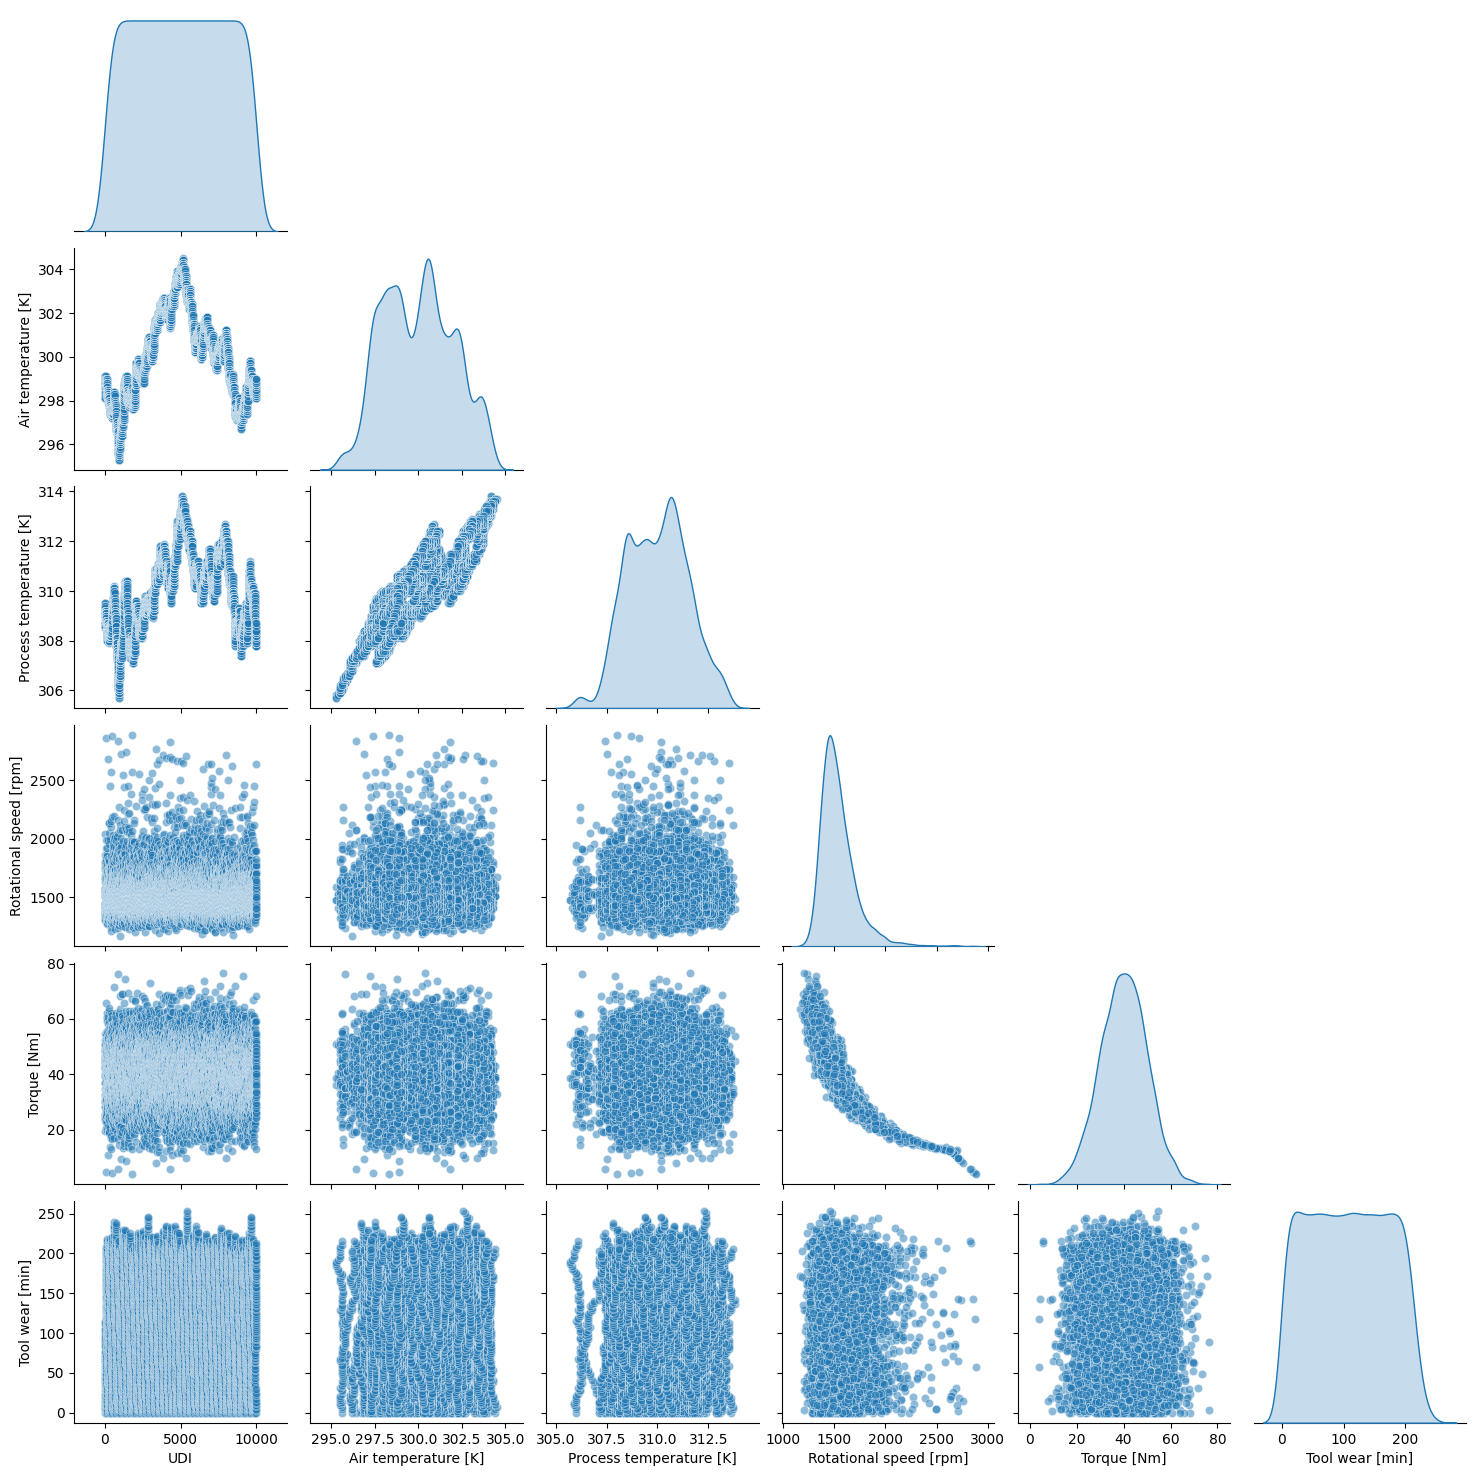

In [15]:
# Pair Plot for Numerical Variables
sns.pairplot(data[numerical_cols].drop(['Target'], axis=1), diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.show()

# Data Visualization:

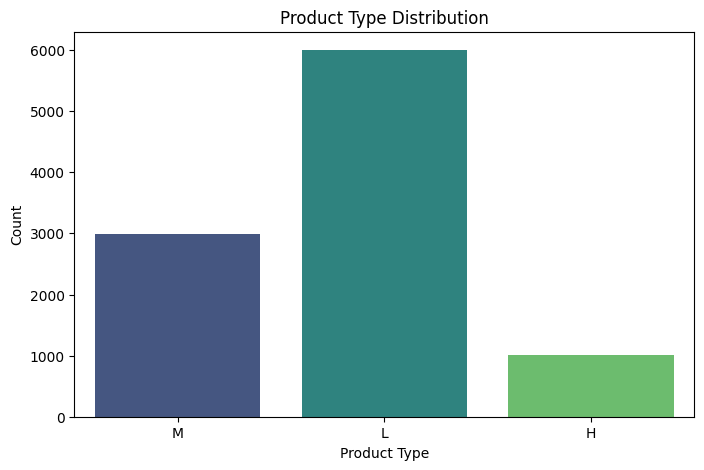

In [16]:
# Bar Chart for Product Type
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Type', palette='viridis')
plt.title('Product Type Distribution')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

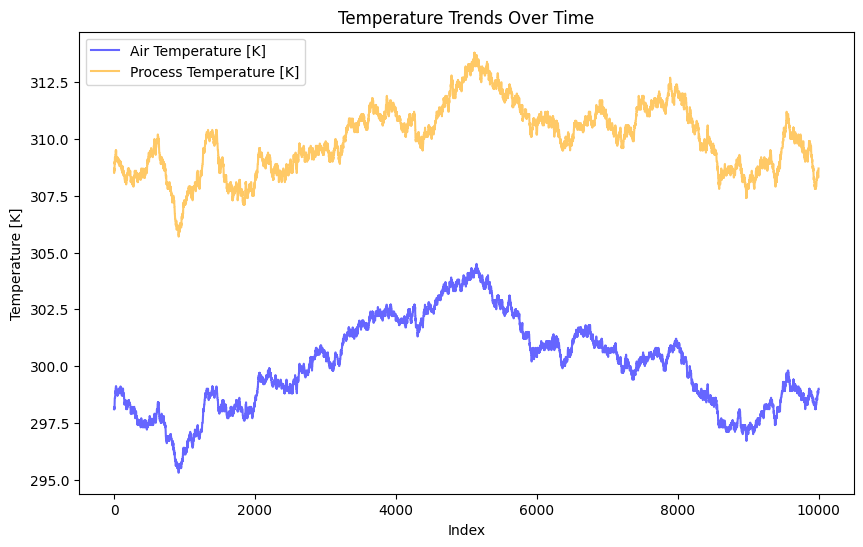

In [17]:
# Line Plot for Air and Process Temperature
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Air temperature [K]'], label='Air Temperature [K]', color='blue', alpha=0.6)
plt.plot(data.index, data['Process temperature [K]'], label='Process Temperature [K]', color='orange', alpha=0.6)
plt.title('Temperature Trends Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature [K]')
plt.legend()
plt.show()

It looks like the Temperature trend over time is similar for Air Temperature and Process Temperature similar.

# Identifying Patterns and Trends:

In [18]:
# Example: Investigating Tool Wear and Failure Type
tool_wear_failure = data.groupby('Failure Type')['Tool wear [min]'].mean()
print("\nAverage Tool Wear for Different Failure Types:")
print(tool_wear_failure)


Average Tool Wear for Different Failure Types:
Failure Type
Heat Dissipation Failure    107.339286
No Failure                  106.678927
Overstrain Failure          208.217949
Power Failure               101.884211
Random Failures             119.888889
Tool Wear Failure           216.555556
Name: Tool wear [min], dtype: float64


The mean tool wear varies significantly across different failure types, highlighting distinct patterns. Machines experiencing Tool Wear Failure have the highest average tool wear (216.56 minutes), followed closely by Overstrain Failure (208.22 minutes). In contrast, Power Failures exhibit the lowest average tool wear (101.88 minutes), and No Failure instances have an average tool wear of 106.68 minutes. These observations suggest that specific failure modes may be linked to higher wear on tools, especially for Tool Wear Failures, which directly correlate with prolonged usage.

### Look for patterns over time (if applicable) or across different categories (e.g., country, group, etc.).

In [19]:
# Mean Analysis by Machine Type
mean_torque_by_type = data.groupby('Type')['Torque [Nm]'].mean()
print("\nMean Torque by Machine Type:")
print(mean_torque_by_type)

mean_tool_wear_by_type = data.groupby('Type')['Tool wear [min]'].mean()
print("\nMean Tool Wear by Machine Type:")
print(mean_tool_wear_by_type)


Mean Torque by Machine Type:
Type
H    39.838285
L    39.996600
M    40.017251
Name: Torque [Nm], dtype: float64

Mean Tool Wear by Machine Type:
Type
H    107.419741
L    108.378833
M    107.272272
Name: Tool wear [min], dtype: float64


For torque, Machine Type M exhibits the highest average at 40.017 Nm, followed closely by Type L at 39.997 Nm, and Type H at 39.838 Nm. This indicates minimal variation in torque values across machine types, with differences within a narrow range. Regarding tool wear, Machine Type L has the highest mean tool wear at 108.379 minutes, followed by Type H at 107.420 minutes, and Type M at 107.272 minutes. Similar to torque, the differences in tool wear are marginal, suggesting a consistent performance among the machines in both torque and tool wear metrics.

# Hypothesis Testing:

### Hypothesis: Does the type of machine affect the target variable?

In [20]:
types = data['Type'].unique()
groups = [data[data['Type'] == t]['Target'] for t in types]
if len(groups) > 1:
    stat, p_value = ttest_ind(groups[0], groups[1])
    print("\nT-Test Results:")
    print("Statistic:", stat)
    print("P-Value:", p_value)
else:
    print("\nT-Test could not be performed due to insufficient groups.")


T-Test Results:
Statistic: -2.77848574077529
P-Value: 0.005472616125521476


The T-test was conducted to compare the means of the target variable across two groups. The negative statistic indicates the direction of the difference between the group means. The p-value is 0.00547, which is less than the standard significance level of 0.05. This suggests that there is a statistically significant difference between the means of the two groups, meaning the type of machine likely affects the target variable.

### Hypothesis: Is there a relationship between Failure Type and Target?

In [21]:
chi2_stat, p, dof, expected = chi2_contingency(pd.crosstab(data_cleaned['Failure Type'], data_cleaned['Target']))
print("\nChi-Squared Test Results:")
print("Chi2 Stat:", chi2_stat)
print("P-Value:", p)
print("Degrees of Freedom:", dof)


Chi-Squared Test Results:
Chi2 Stat: 0.0
P-Value: 1.0
Degrees of Freedom: 0


The Chi-Squared test evaluates the association between two categorical variables failure type and target. Here, the Chi2 statistic is 0, and the p-value is 1.0, indicating no association between the variables. The degrees of freedom being 0 may suggest that the data lacks sufficient variability or there is only one category in the dataset for one of the variables, making the test non-informative.

### Hypothesis: Air temperature affects the machine failure rate

In [22]:
failed = data[data['Target'] == 1]['Air temperature [K]']
not_failed = data[data['Target'] == 0]['Air temperature [K]']

t_stat, p_value = ttest_ind(failed, not_failed)
print("\nHypothesis Test: Difference in Air Temperature Between Failed and Not Failed Machines")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Conclusion: Reject null hypothesis - Air temperature has a significant effect on machine failure.")
else:
    print("Conclusion: Fail to reject null hypothesis - No significant effect of air temperature on machine failure.")


Hypothesis Test: Difference in Air Temperature Between Failed and Not Failed Machines
T-statistic: 8.283, P-value: 0.000
Conclusion: Reject null hypothesis - Air temperature has a significant effect on machine failure.


The hypothesis test confirms that air temperature significantly impacts machine failures. With a T-statistic of 8.283 and a P-value of 0.000, we reject the null hypothesis, concluding that air temperature differences between failed and non-failed machines are statistically significant. This finding indicates that machines operating under varying air temperature conditions may face different probabilities of failure.

### Hypothesis : Product type is associated with failure type

In [23]:
contingency_table = pd.crosstab(data['Type'], data['Failure Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nHypothesis Test: Association Between Product Type and Failure Type")
print(f"Chi-squared: {chi2:.3f}, P-value: {p:.3f}")
if p < 0.05:
    print("Conclusion: Reject null hypothesis - Product type is associated with failure type.")
else:
    print("Conclusion: Fail to reject null hypothesis - No significant association between product type and failure type.")


Hypothesis Test: Association Between Product Type and Failure Type
Chi-squared: 47.231, P-value: 0.000
Conclusion: Reject null hypothesis - Product type is associated with failure type.


The chi-square test reveals a significant association between product type and failure type, with a Chi-squared statistic of 47.231 and a P-value of 0.000. This leads to rejecting the null hypothesis, suggesting that the product type (e.g., low, medium, or high-quality variants) plays a role in the likelihood and nature of machine failures. The product quality may influence failure modes, possibly due to variations in design, material, or operational limits.

# InSights: Exploring the Combined Impact of Rotational Speed and Torque on Machine Failures

### Now we will see how the combination of Rotational Speed and Torque influences machine failure, focusing on specific failure types. The goal is to identify ranges of operational parameters (speed and torque) that lead to higher failure rates and specific failure modes.

In [24]:
# Binning Rotational Speed and Torque
data['Speed_bin'] = pd.cut(data['Rotational speed [rpm]'], bins=[1200, 1450, 1750, 2000, 2500], labels=['Low', 'Medium', 'High', 'Very High'])
data['Torque_bin'] = pd.cut(data['Torque [Nm]'], bins=[10 , 20, 35, 55, 70], labels=['Low', 'Medium', 'High', 'Very High'])

In [25]:
# Group by Bins and Calculate Failure Rate
failure_rate = data.groupby(['Speed_bin', 'Torque_bin'])['Target'].mean().unstack()

<ipython-input-25-7a4ef76ab180>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rate = data.groupby(['Speed_bin', 'Torque_bin'])['Target'].mean().unstack()


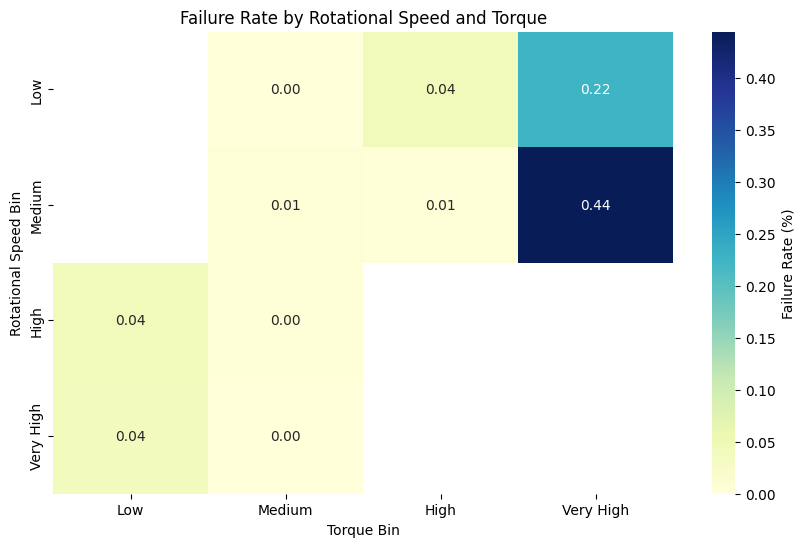

In [26]:
# Visualize the Failure Rate
plt.figure(figsize=(10, 6))
sns.heatmap(failure_rate, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Failure Rate (%)'})
plt.title('Failure Rate by Rotational Speed and Torque')
plt.xlabel('Torque Bin')
plt.ylabel('Rotational Speed Bin')
plt.show()

**Low Speed**: At low rotational speeds, machines in the "Very High" torque bin show the highest failure rate (22.47%). The failure rate decreases significantly in the "High" torque bin (4.4%) and is nonexistent in lower torque bins.

**Medium Speed**: Medium rotational speeds demonstrate a notable failure rate in the "Very High" torque bin (44.44%), indicating high torque is a critical factor for failures in this range. Lower torque bins show very few failures.

**High Speed and Very High Speed**: High and Very High speed bins exhibit negligible or no failure rates across most torque categories. *Machines running at these speeds likely operate within safer torque ranges, reducing the likelihood of failure.*

In [27]:
# Failure Type Analysis
failure_type_counts = data.groupby(['Speed_bin', 'Torque_bin', 'Failure Type']).size().reset_index(name='Count')

<ipython-input-27-b0f7df426818>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_type_counts = data.groupby(['Speed_bin', 'Torque_bin', 'Failure Type']).size().reset_index(name='Count')


#### Now we will plot Stacked Area Plot because it helps visualize trends and contributions of each failure type over different rotational speed bins. It's great for showing how proportions changes!

<Figure size 1200x600 with 0 Axes>

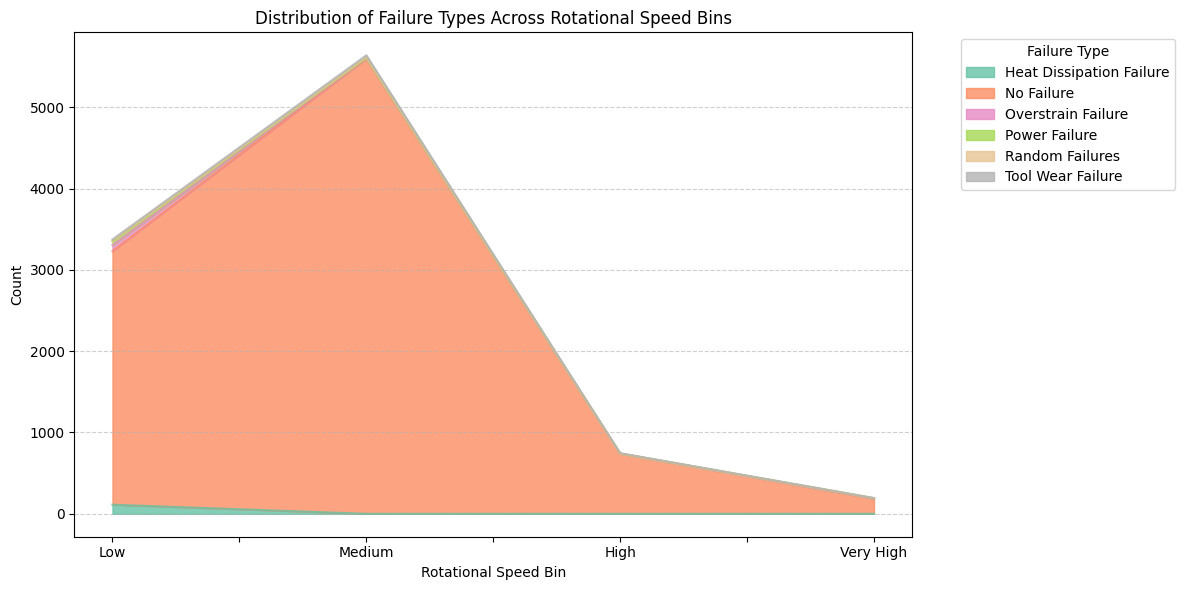

In [28]:
# Pivot data for stacked area plot
stacked_data = failure_type_counts.pivot_table(index='Speed_bin', columns='Failure Type', values='Count', aggfunc='sum', fill_value=0)

# Plot stacked area chart
plt.figure(figsize=(12, 6))
stacked_data.plot(kind='area', stacked=True, colormap='Set2', figsize=(12, 6), alpha=0.8)
plt.title('Distribution of Failure Types Across Rotational Speed Bins')
plt.xlabel('Rotational Speed Bin')
plt.ylabel('Count')
plt.legend(title='Failure Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Low Speed**: "No Failure" is the most frequent outcome (3,118 counts), followed by a smaller number of "Overstrain Failures" (73) and "Heat Dissipation Failures" (112). Other failure types, like "Tool Wear Failures" and "Power Failures," are less common.

**Medium Speed**: Machines running at medium speed overwhelmingly fall into the "No Failure" category (5,597 counts), with minimal instances of "Tool Wear Failures" (24), "Random Failures" (10), and other types.

**High Speed and Very High Speed**: At these speed levels, the majority of cases are "No Failure." Failure counts for all other categories are extremely low, with just a few instances of "Tool Wear Failures" or "Power Failures."

# Insights from this:

### Failure Rates by Speed and Torque:

 - Machines operating at very high torque levels (>55 Nm) are more prone to failures, especially at low and medium speeds. This suggests that torque exerts significant stress on the machinery at these speed ranges.
 - At higher speeds, failure rates drop significantly, possibly due to better operational stability at optimal torque ranges.

### Failure Type Distribution:

 - The dominance of "No Failure" across all speed bins highlights that most machines operate within safe limits.
 - "Tool Wear Failure" and "Overstrain Failure" appear more frequently in low and medium speed bins, indicating that operational stress at these ranges is a key driver of failures.
 - The rarity of "Random Failures" and "Power Failures" across all bins suggests these are less common and may depend on external or sporadic factors.
